In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 425 (delta 100), reused 152 (delta 65), pack-reused 193
Receiving objects: 100% (425/425), 8.68 MiB | 12.22 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep="\t", names = ['label','text'])

In [93]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
df = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep="\t", names = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.shape

(5572, 2)

Data cleaning

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
sn = SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [27]:
def clean_text(sms):
  sms = sms.lower()
  sms = re.sub("[^a-z]", ' ',sms)
  sms = nltk.word_tokenize(sms)
  sms = [t for t in sms if len(t)>1]
  sms = [sn.stem(word) for word in sms if word not in stop]
  sms = ' '.join(sms)

  return sms

In [22]:
clean_text("Get this stuff for free just Rs.10")

['get', 'this', 'stuff', 'for', 'free', 'just', 'rs']

In [29]:
df['clean_text'] = df['text'].apply(clean_text)

In [30]:
df.head()


,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


Word cloud

In [31]:
from wordcloud import WordCloud

In [37]:
hamdata = df[df['label'] == 'ham']
hamdata = hamdata['clean_text']

In [35]:
def wordCloud(data):
  words=' '.join(data)
  wc = WordCloud(background_color= 'white')
  wc = wc.generate(words)

  plt.figure(figsize= (10,8))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

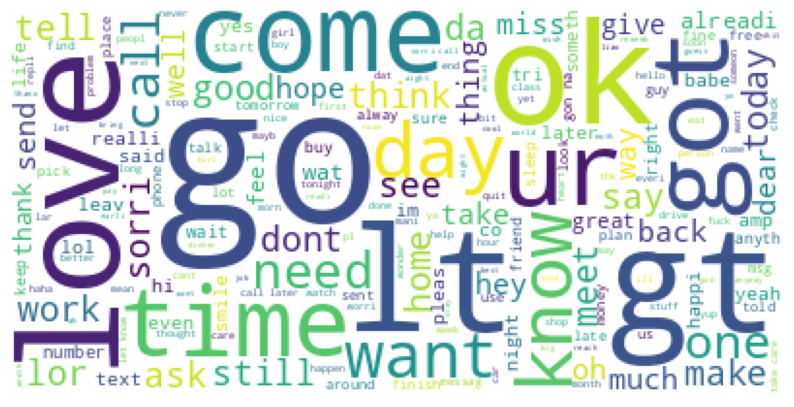

In [41]:
wordCloud(hamdata)

In [38]:
spamdata = df[df['label'] == 'spam']
spamdata = spamdata['clean_text']

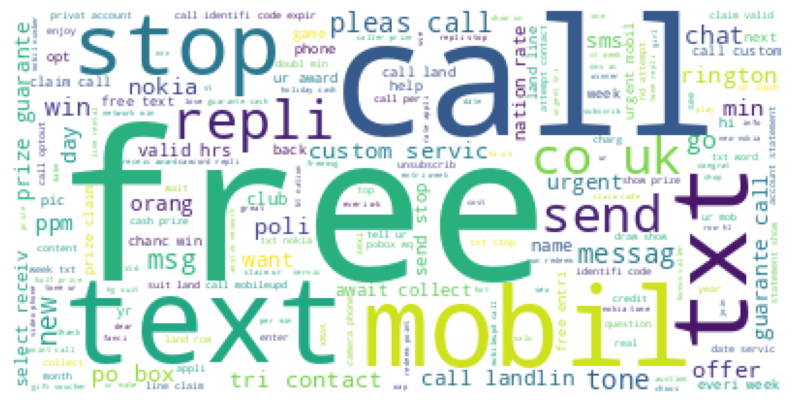

In [40]:
wordCloud(spamdata)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv = CountVectorizer(max_features = 5000)

In [48]:
X = cv.fit_transform(df['clean_text']).toarray()

In [49]:
X.shape

(5572, 5000)

In [52]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

Model Building

In [54]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [107]:
from sklearn.naive_bayes import MultinomialNB

In [112]:
model.fit(X_train,y_train)

NameError: ignored

In [113]:
y_pred = model.predict(X_test)

NameError: ignored

In [87]:
y_test,y_pred

NameError: ignored

In [64]:
pd.DataFrame({'Actual' : y_test, 'predicted': y_pred}).head(10)

NameError: ignored

In [65]:
print("Accuracy on Training Data :")
print(model.score(X-train,y_train))

Accuracy on Training Data :


NameError: ignored

In [66]:
print("Accuracy on Testing Data")
print(model.score(X_test,y_test))

Accuracy on Testing Data


NameError: ignored